# Pump failure data -  JAGS

#### Josep Fortiana 2018-12-17

### Problem description

A benchmark hierarchical example in the Gibbs sampling literature describes the number of failures and times of observation of ten pumps in a nuclear plant, with the data given in the following table:
	
$$
\begin{array}{l|cccccccccc}
	\hline
	\text{Pump}    &1		&2		&3		&4		&5		&6		&7		&8		&9		&10\\[0.2cm]
	\hline
	\text{Failures}&5		&1		&5		&14		&3		&19		&1		&1		&4		&22\\[0.2cm]
	\text{Time}	&94.32 	&15.72 	&62.88 	&125.76 &5.24 	&31.44 	&1.05 	&1.05 	&2.10 	&10.48\\[0.2cm]
	\hline
\end{array}
$$

Source: Gaver, D. P. & O'Muircheartaigh, I G. (1987). _Robust empirical Bayes analysis of event rates._ Technometrics 29, No. 1, pp. 1-15.

The modeling is based on the assumption that the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq 10)$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a Poisson $\operatorname{Poisson}(\lambda_{i}\cdot t_{i})$ random variable. The standard prior distributions are gamma distributions, which lead to the hierarchical model:
	
$$
    \begin{array}{cll}
	X_{i}		&\sim\operatorname{Poisson}(\lambda_{i}\cdot t_{i}), &i=1,\dots,10,\\
    \lambda_{i}&\sim\operatorname{Gamma}(\alpha,\beta),              &i=1,\dots,10,\\
	\beta		&\sim\operatorname{Gamma}(\gamma,\delta).
    \end{array}
$$

The hyperparameters $\alpha$, $\gamma$ and $\delta$ take constant values to be decided. Roberts and Casella use $\alpha=1.8$, $\gamma=0.01$ and $\delta=1.0$.

In the original paper where this data were first used, George and McCulloch (1993), they use a further prior:

$$
    \begin{array}{cll}
    \alpha &\sim\operatorname{Exp}(\omega),&\mskip120mu
    \end{array}
$$
	
with $\omega=1.0$ instead of a constant value.

In [1]:
#install.packages("R2jags", repos= "https://cloud.r-project.org")
require(R2jags)

Loading required package: R2jags
Loading required package: rjags
Loading required package: coda
Linked to JAGS 4.2.0
Loaded modules: basemod,bugs

Attaching package: 'R2jags'

The following object is masked from 'package:coda':

    traceplot



## Data 

In [2]:
n<-10
t<-c(94.3, 15.7, 62.9, 126, 5.24, 31.4, 1.05, 1.05, 2.1, 10.5)
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)

In [3]:
pumps.data<-list(n=n,t=t,x=x)

### Model

In [12]:
pumps.model<-"model{
    for (i in 1:n) {
        lambda[i] ~ dgamma(alpha, beta)
        theta[i] <- lambda[i] * t[i]
        x[i] ~ dpois(theta[i])
        }
    alpha ~ dexp(1)
    beta ~ dgamma(0.1, 1.0)
    }"

cat(pumps.model,file="pumps.model.jags")

### Inits

In [13]:
pumps.inits<-list(alpha = 1, beta = 1)

### Run JAGS

In [14]:
pumps.m1<-jags(data=pumps.data,n.chains=3,parameters.to.save=c("alpha", "beta","lambda"), 
        model.file="pumps.model.jags",n.iter=10000,n.burnin=2000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10
   Unobserved stochastic nodes: 12
   Total graph size: 46

Initializing model



In [15]:
pumps.m1.mcmc<-as.mcmc(pumps.m1)
summary(pumps.m1.mcmc)


Iterations = 2001:9993
Thinning interval = 8 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
alpha       0.69502 0.26650 0.0048656      0.0049879
beta        0.92318 0.53368 0.0097436      0.0099728
deviance   42.75489 4.26730 0.0779100      0.0780431
lambda[1]   0.06017 0.02568 0.0004689      0.0004690
lambda[10]  1.98785 0.41673 0.0076085      0.0074861
lambda[2]   0.10163 0.07983 0.0014575      0.0015237
lambda[3]   0.08907 0.03797 0.0006932      0.0007184
lambda[4]   0.11534 0.03027 0.0005526      0.0005528
lambda[5]   0.60735 0.31549 0.0057600      0.0057818
lambda[6]   0.61084 0.13598 0.0024826      0.0023877
lambda[7]   0.88992 0.73824 0.0134784      0.0134729
lambda[8]   0.89207 0.72405 0.0132194      0.0135110
lambda[9]   1.56806 0.76695 0.0140026      0.0139922

2. Quantiles for each variable:

               2.5%      25

In [16]:
pumps.m2<-update(pumps.m1,n.iter=10000)

In [17]:
pumps.m2.mcmc<-as.mcmc(pumps.m2)
summary(pumps.m2.mcmc)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
alpha       0.69188 0.26554 0.0015331      0.0034749
beta        0.91614 0.53332 0.0030791      0.0064491
deviance   42.72915 4.19512 0.0242205      0.0237941
lambda[1]   0.05982 0.02521 0.0001455      0.0001464
lambda[10]  1.99515 0.42410 0.0024485      0.0025810
lambda[2]   0.10156 0.07952 0.0004591      0.0004967
lambda[3]   0.08890 0.03738 0.0002158      0.0002161
lambda[4]   0.11572 0.03044 0.0001757      0.0001831
lambda[5]   0.60262 0.31684 0.0018293      0.0017853
lambda[6]   0.60914 0.13801 0.0007968      0.0007968
lambda[7]   0.89390 0.72805 0.0042034      0.0045817
lambda[8]   0.89913 0.72698 0.0041972      0.0047243
lambda[9]   1.59171 0.76998 0.0044455      0.0049194

2. Quantiles for each variable:

                2.5%      25

In [18]:
str(pumps.m2.mcmc)

List of 3
 $ : 'mcmc' num [1:10000, 1:13] 0.889 1.091 1.26 1.137 1.123 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:13] "alpha" "beta" "deviance" "lambda[1]" ...
  ..- attr(*, "mcpar")= num [1:3] 1 10000 1
 $ : 'mcmc' num [1:10000, 1:13] 0.337 0.509 0.533 0.796 0.893 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:13] "alpha" "beta" "deviance" "lambda[1]" ...
  ..- attr(*, "mcpar")= num [1:3] 1 10000 1
 $ : 'mcmc' num [1:10000, 1:13] 0.496 0.52 0.707 0.707 0.864 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:13] "alpha" "beta" "deviance" "lambda[1]" ...
  ..- attr(*, "mcpar")= num [1:3] 1 10000 1
 - attr(*, "class")= chr "mcmc.list"


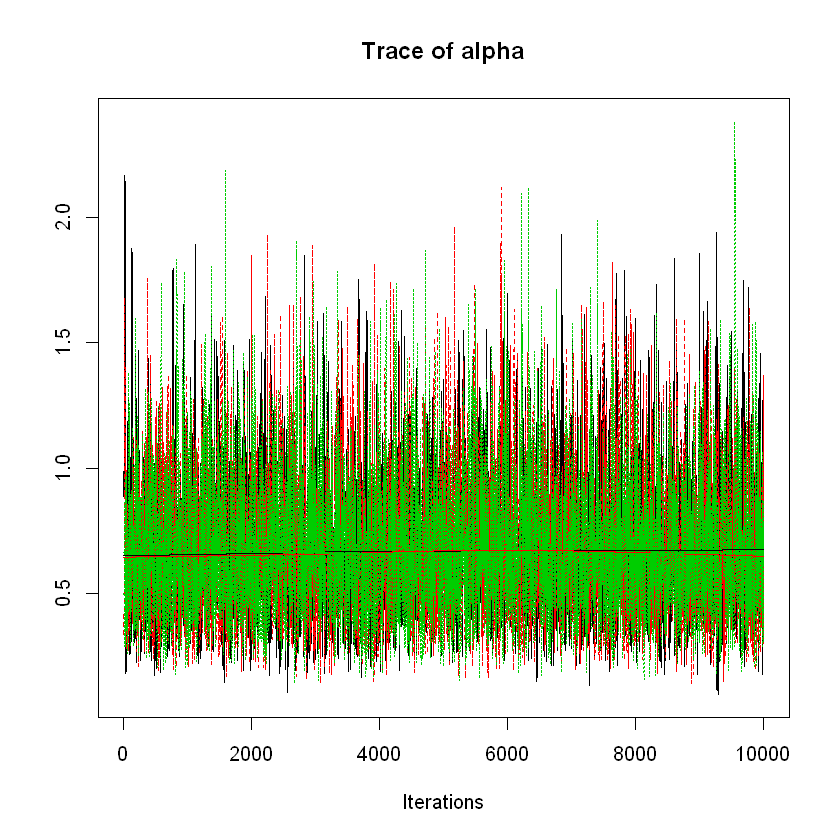

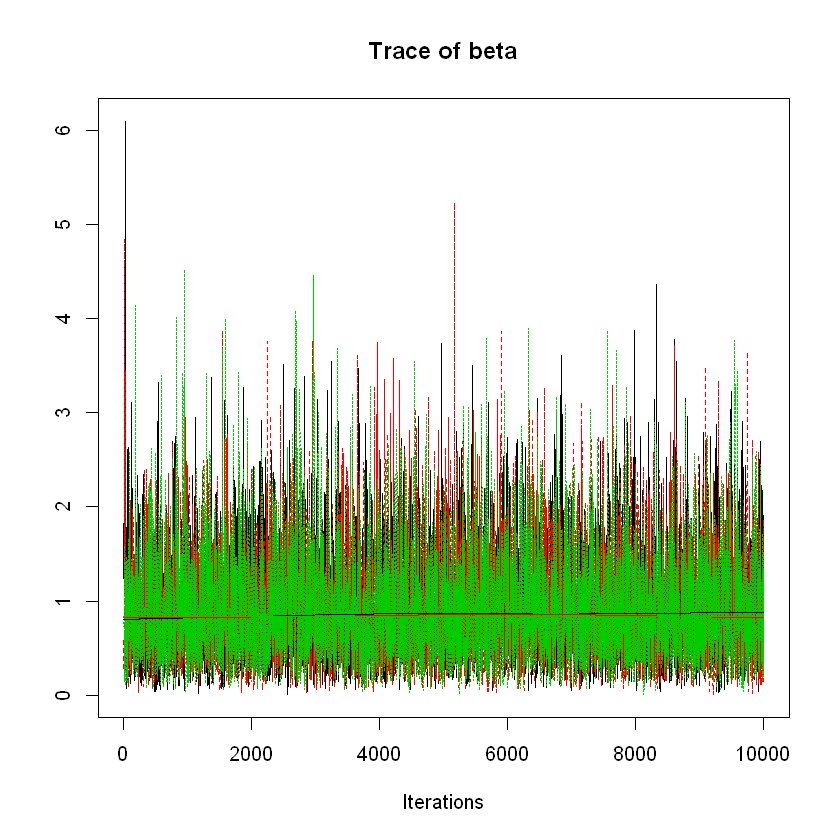

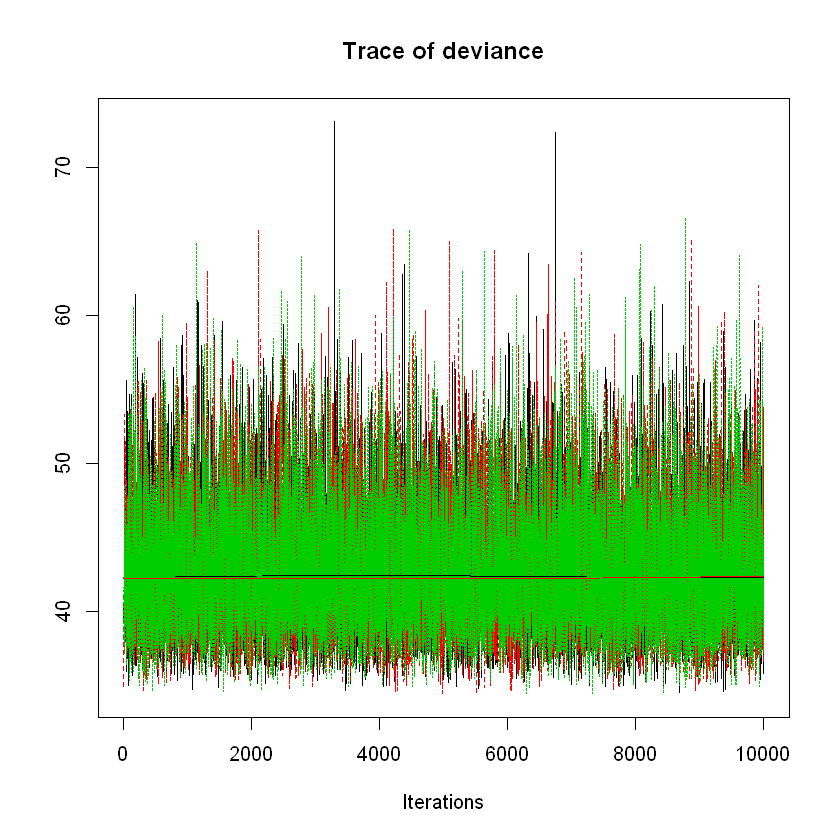

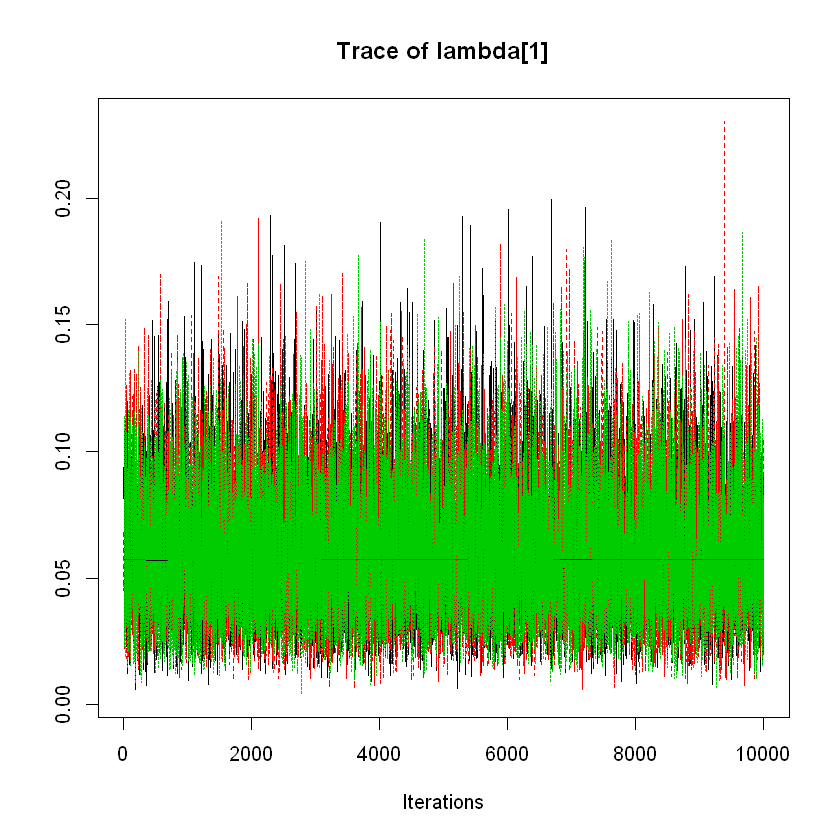

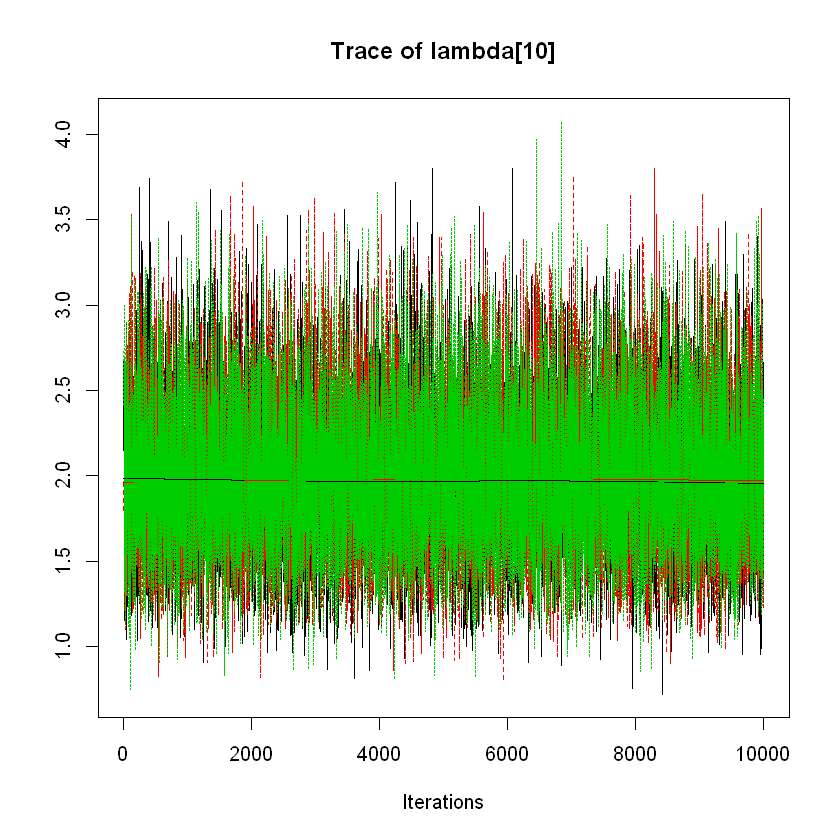

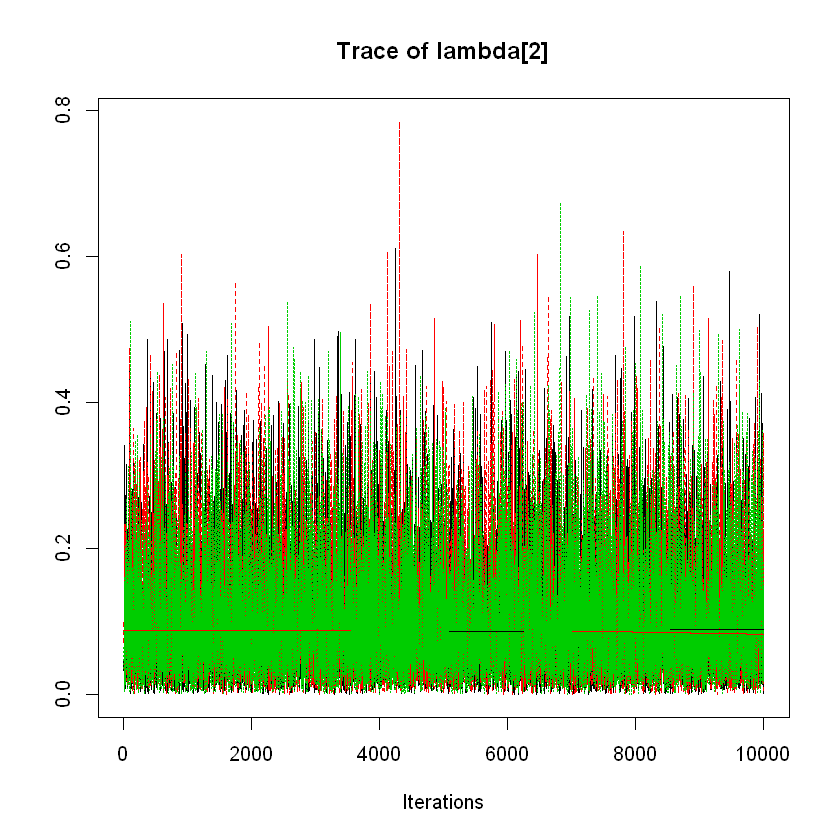

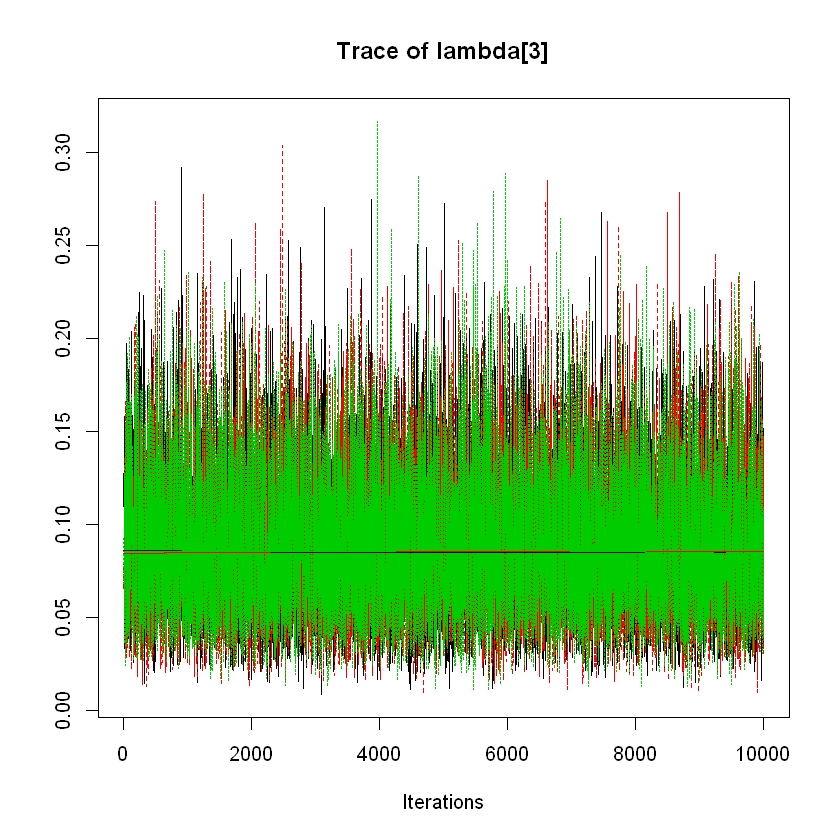

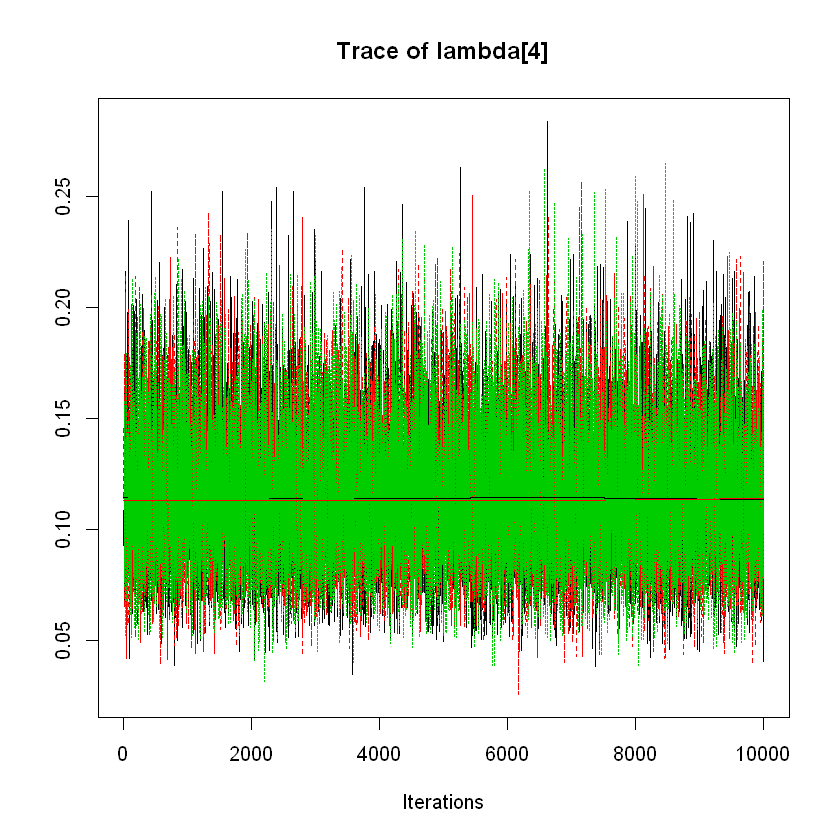

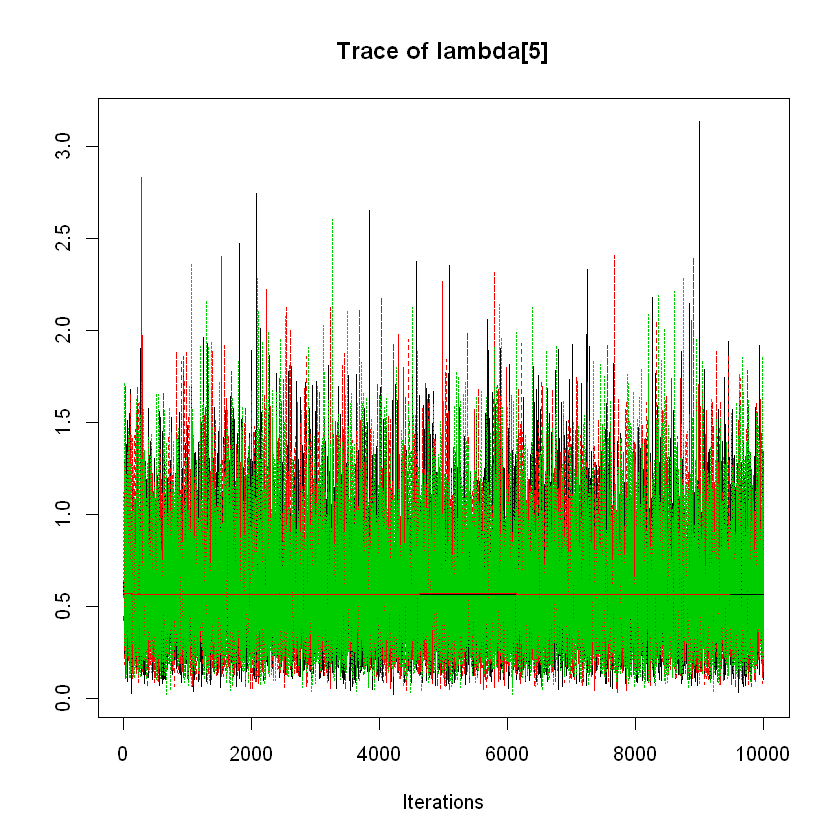

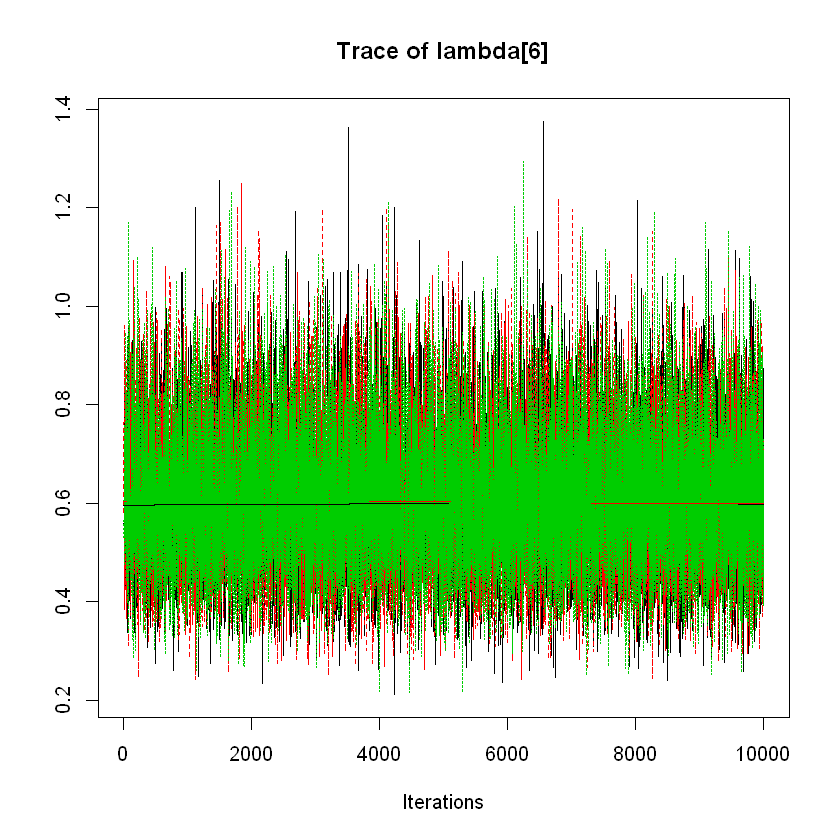

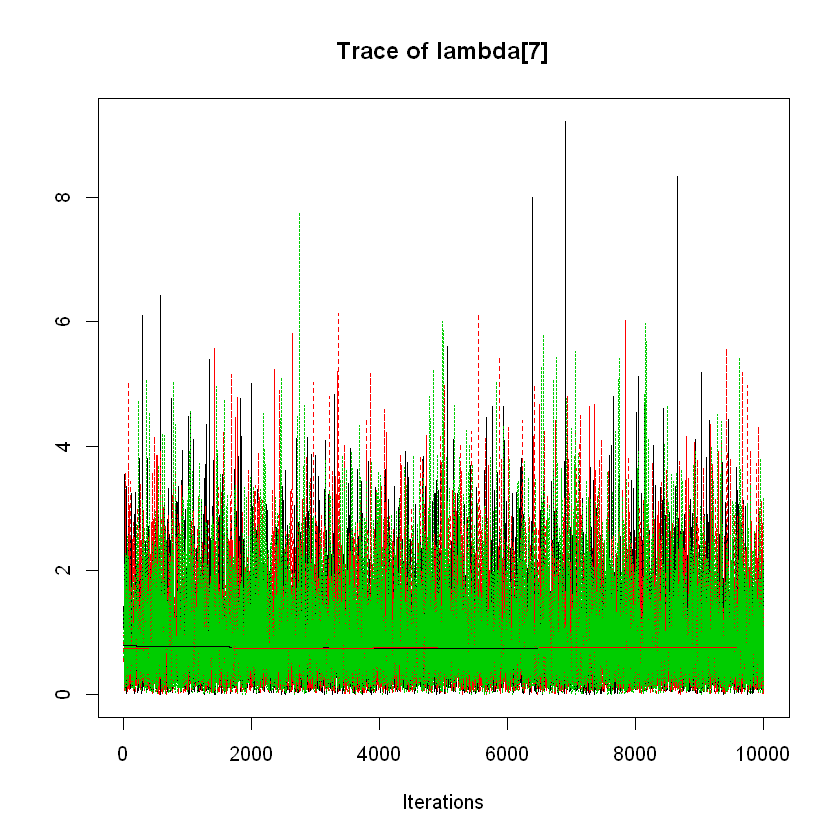

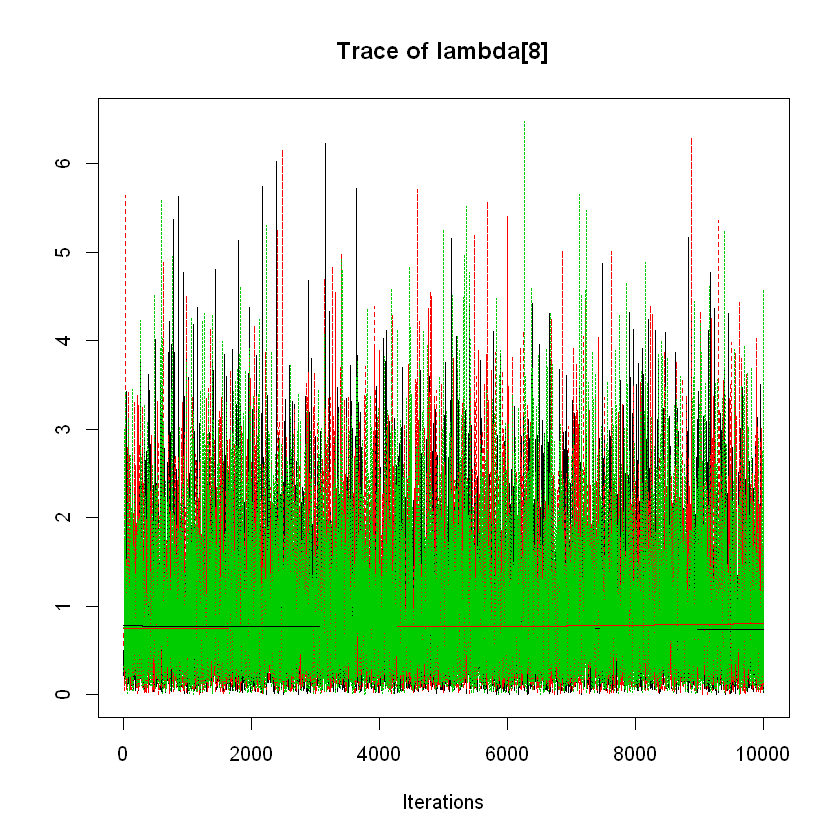

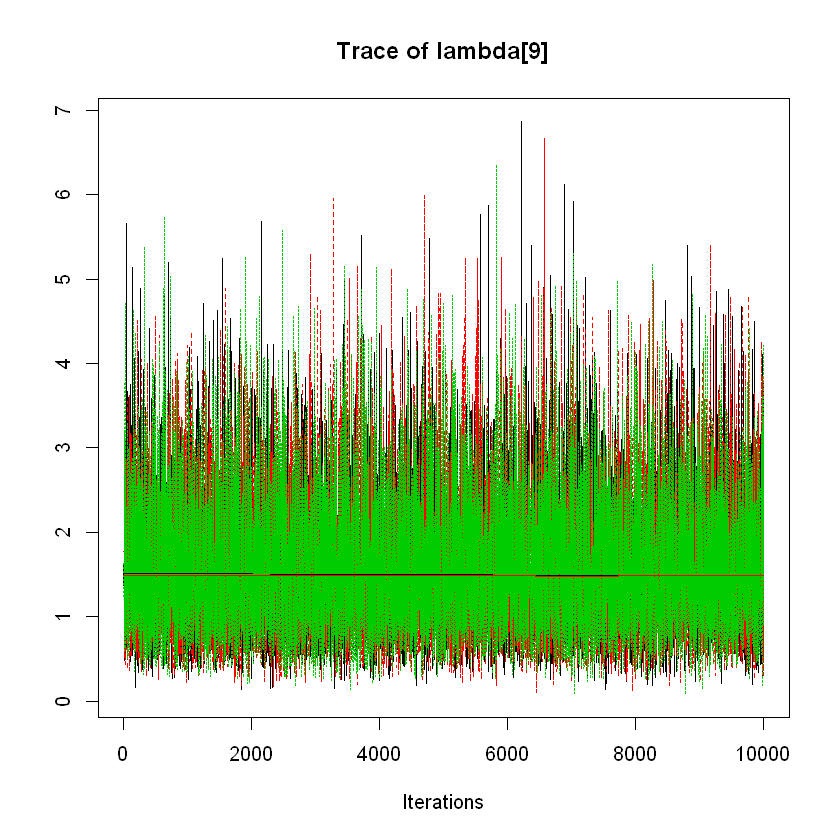

In [19]:
traceplot(pumps.m2.mcmc)

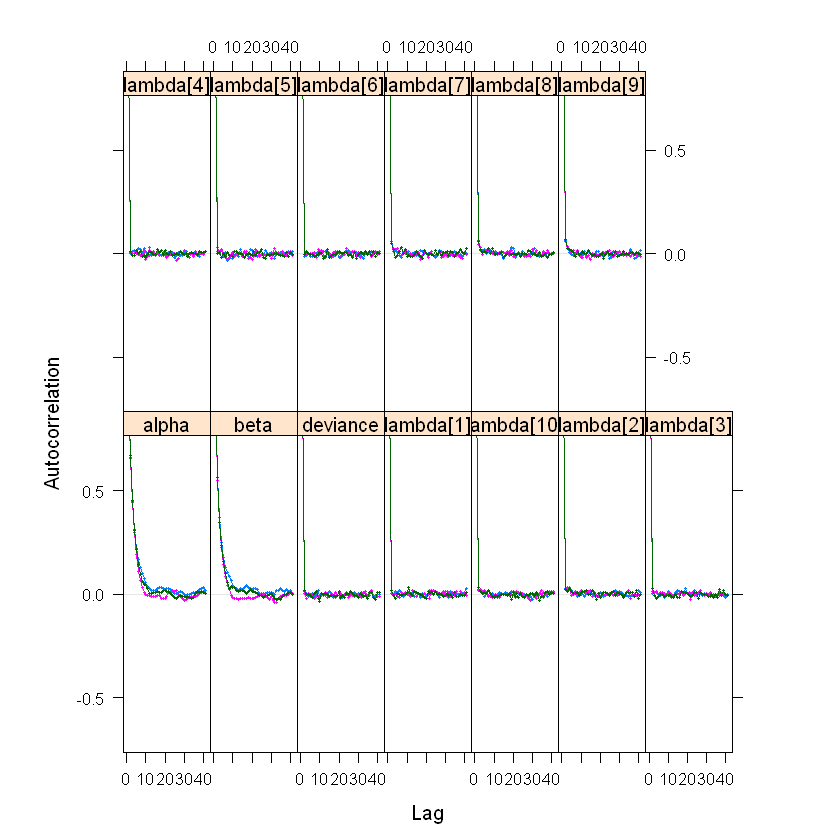

In [20]:
acfplot(pumps.m2.mcmc,cex=0.3)

Loading required package: lattice


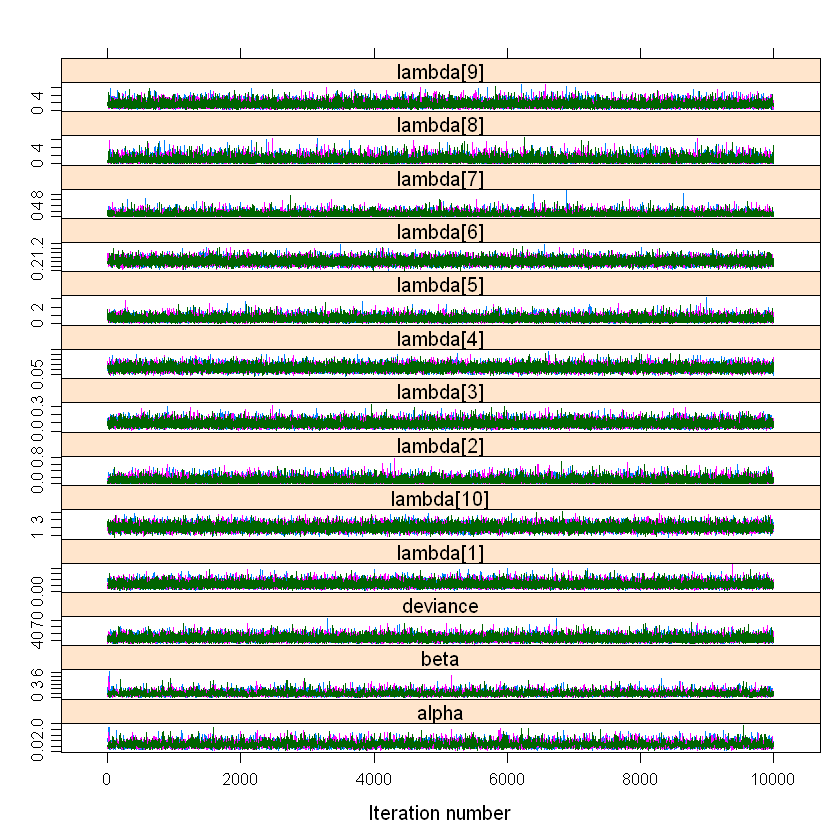

In [21]:
require(lattice)
xyplot(pumps.m2.mcmc)

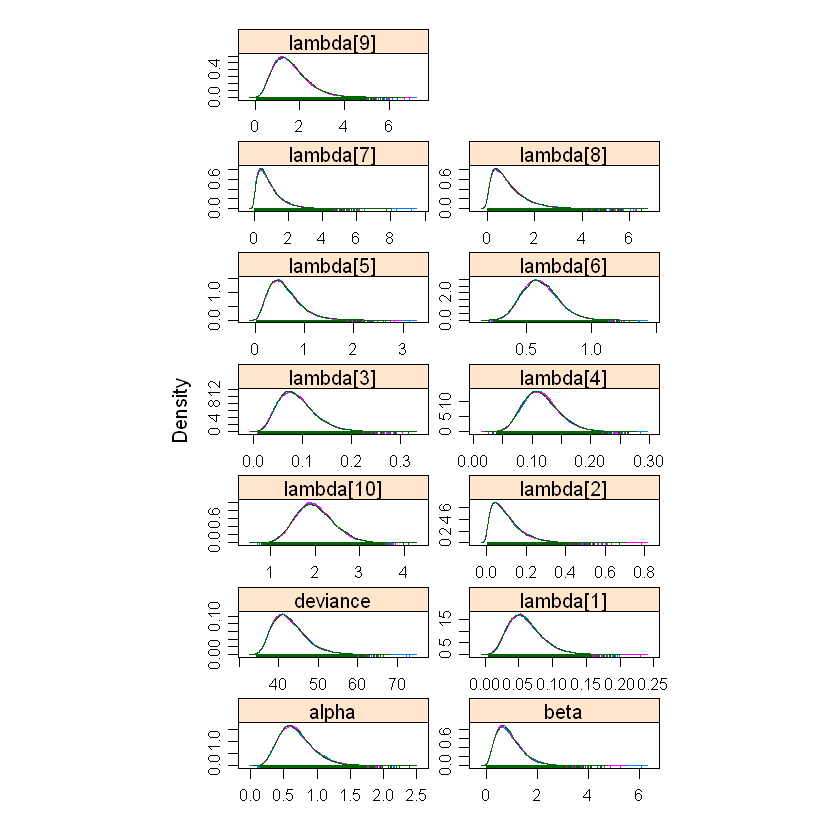

In [22]:
densityplot(pumps.m2.mcmc)

In [23]:
str(pumps.m2.mcmc[[1]])

 'mcmc' num [1:10000, 1:13] 0.889 1.091 1.26 1.137 1.123 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:13] "alpha" "beta" "deviance" "lambda[1]" ...
 - attr(*, "mcpar")= num [1:3] 1 10000 1


In [ ]:
# Vectors of alpha values
alpha.sim.1<-pumps.m2.mcmc[[1]][,1]
alpha.sim.2<-pumps.m2.mcmc[[2]][,1]
alpha.sim.3<-pumps.m2.mcmc[[3]][,1]

In [ ]:
mean(alpha.sim.1)
mean(alpha.sim.2)
mean(alpha.sim.3)

## Classical treatment and comparison of posterior means to ML estimates

In [ ]:
# Either each lambda.i is ML-estimated from a single observation as x.i/t.i
lambda.ML<-x/t
# or a common lambda is ML-estimated as the average of the above
mean.lambda.ML<-mean(lambda.ML)
round(lambda.ML,2)
round(mean.lambda.ML,2)

## Convergence diagnostics

In [24]:
#install.packages("coda", repos= "https://cloud.r-project.org")
require(coda)

### Gelman and Rubin's convergence diagnostic

In [25]:
gelman.diag(pumps.m2.mcmc)

Potential scale reduction factors:

           Point est. Upper C.I.
alpha               1          1
beta                1          1
deviance            1          1
lambda[1]           1          1
lambda[10]          1          1
lambda[2]           1          1
lambda[3]           1          1
lambda[4]           1          1
lambda[5]           1          1
lambda[6]           1          1
lambda[7]           1          1
lambda[8]           1          1
lambda[9]           1          1

Multivariate psrf

1

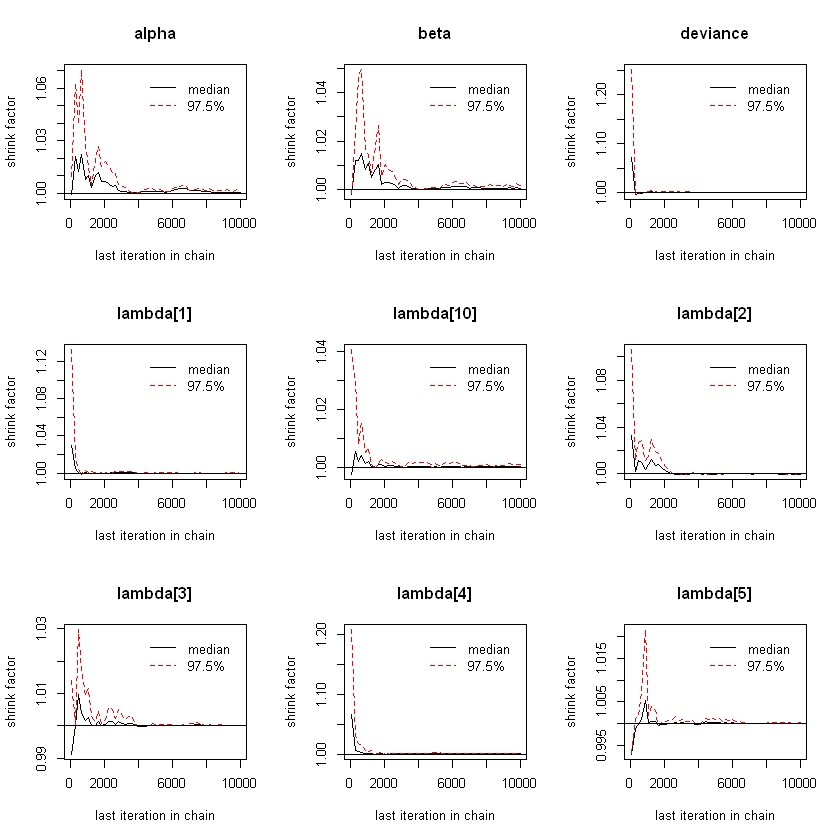

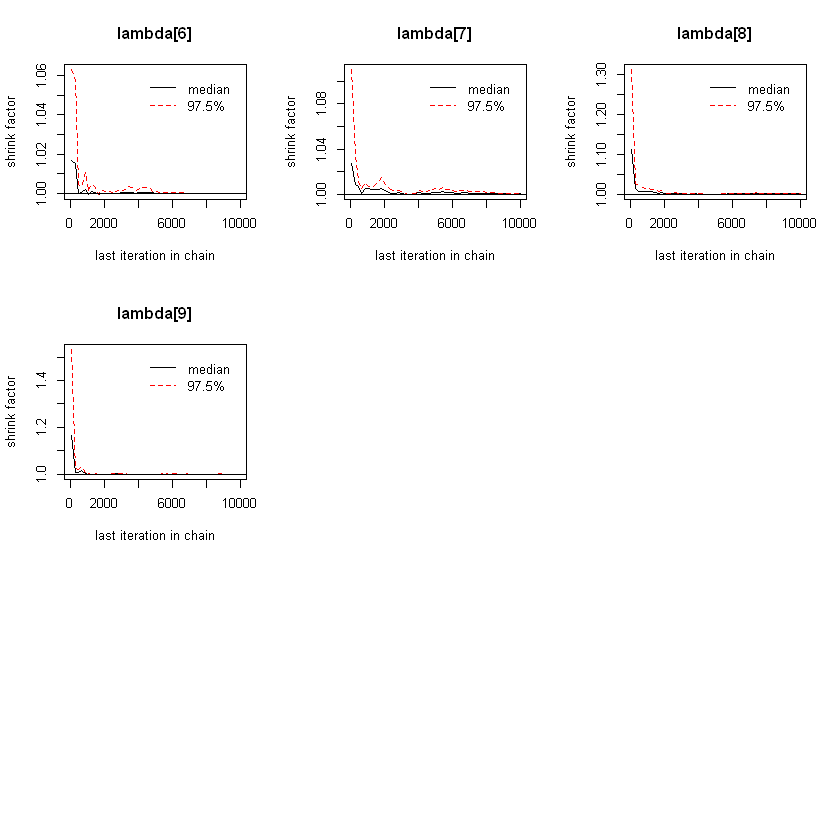

In [26]:
gelman.plot(pumps.m2.mcmc)

### Geweke's convergence diagnostic

In [27]:
geweke.diag(pumps.m2.mcmc)

[[1]]

Fraction in 1st window = 0.1
Fraction in 2nd window = 0.5 

     alpha       beta   deviance  lambda[1] lambda[10]  lambda[2]  lambda[3] 
   -0.4351    -0.5728     0.1243    -0.7393     0.9407     0.8024     2.2140 
 lambda[4]  lambda[5]  lambda[6]  lambda[7]  lambda[8]  lambda[9] 
    0.8828    -0.9882    -1.1506     2.0139     1.6311     0.2372 


[[2]]

Fraction in 1st window = 0.1
Fraction in 2nd window = 0.5 

     alpha       beta   deviance  lambda[1] lambda[10]  lambda[2]  lambda[3] 
  -0.98558   -0.69551   -0.01142    0.88949   -1.42546    1.22845   -1.54799 
 lambda[4]  lambda[5]  lambda[6]  lambda[7]  lambda[8]  lambda[9] 
  -0.53160    0.88987    0.60672   -0.60453   -1.42545   -0.40302 


[[3]]

Fraction in 1st window = 0.1
Fraction in 2nd window = 0.5 

     alpha       beta   deviance  lambda[1] lambda[10]  lambda[2]  lambda[3] 
    0.2124     0.4094     0.1635     0.4346    -0.2467    -1.8683     1.3688 
 lambda[4]  lambda[5]  lambda[6]  lambda[7]  lambda[8]  lam

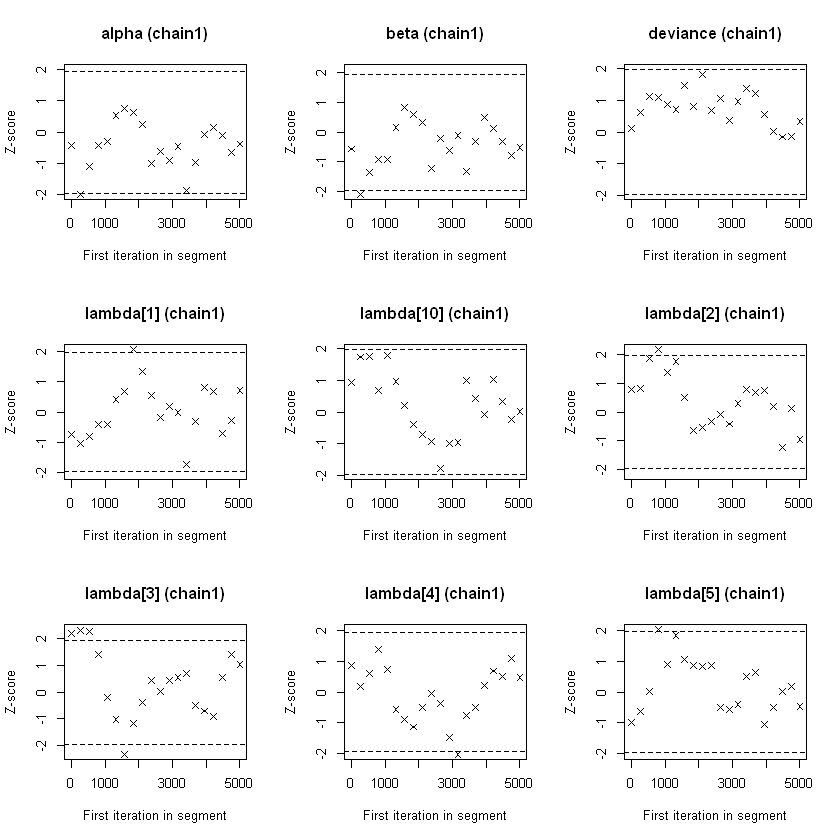

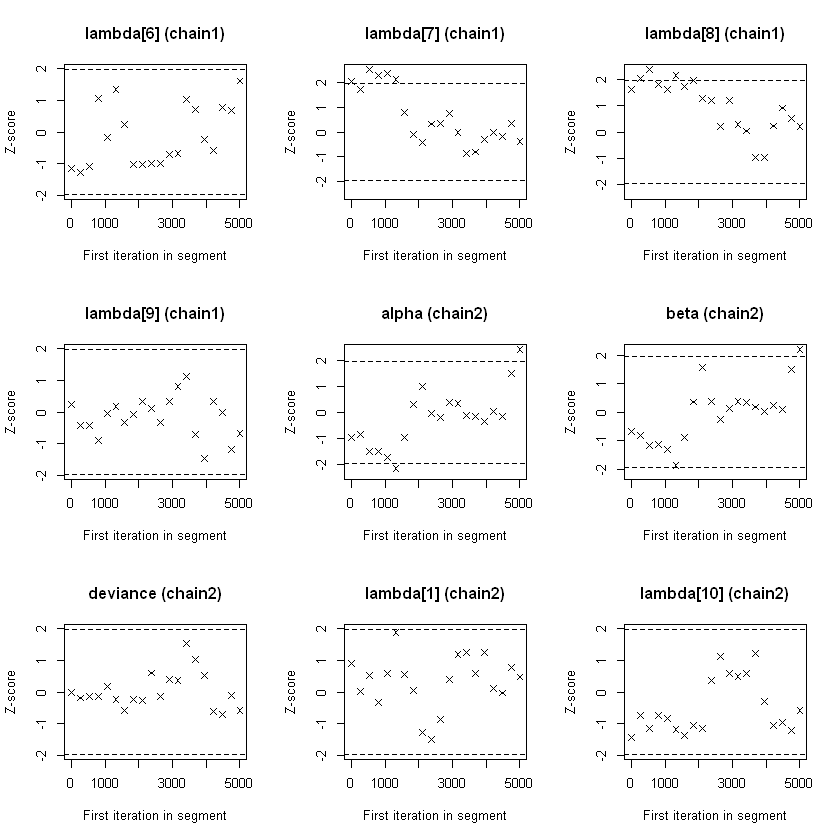

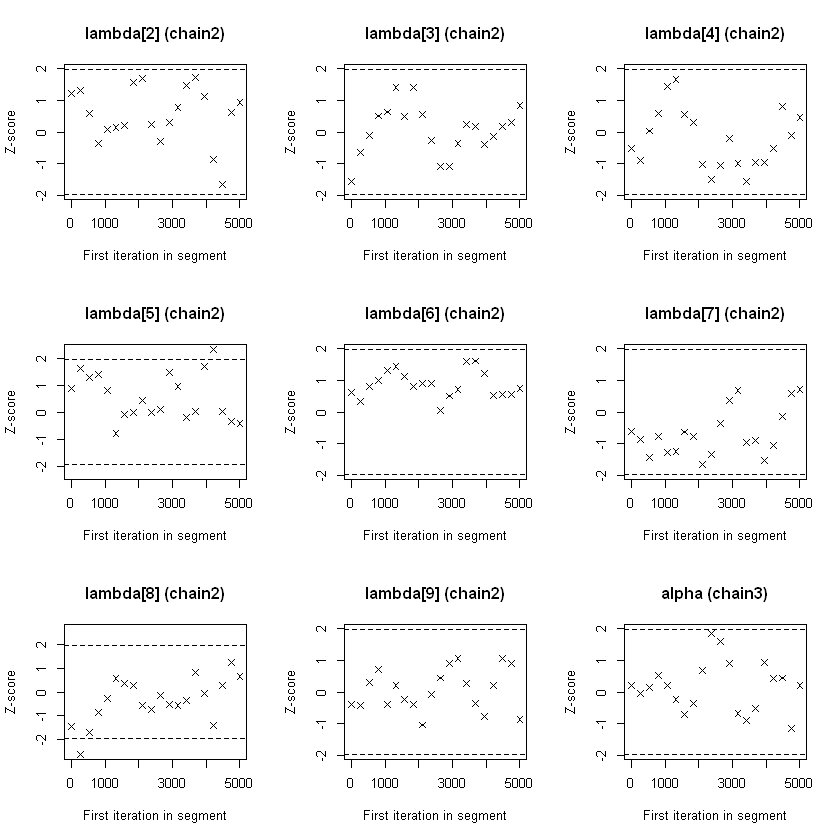

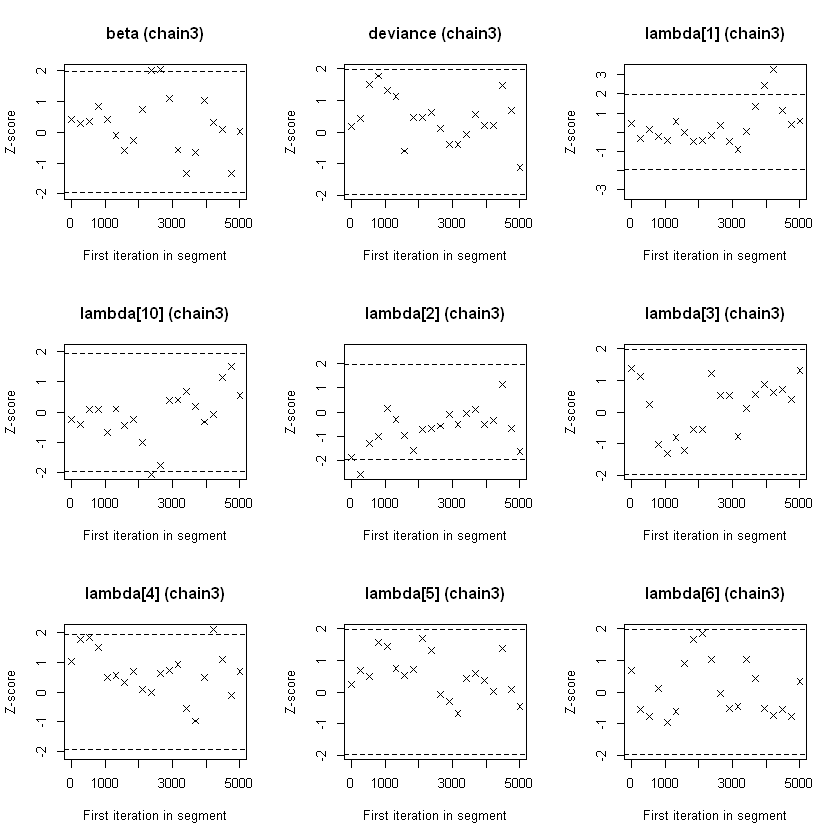

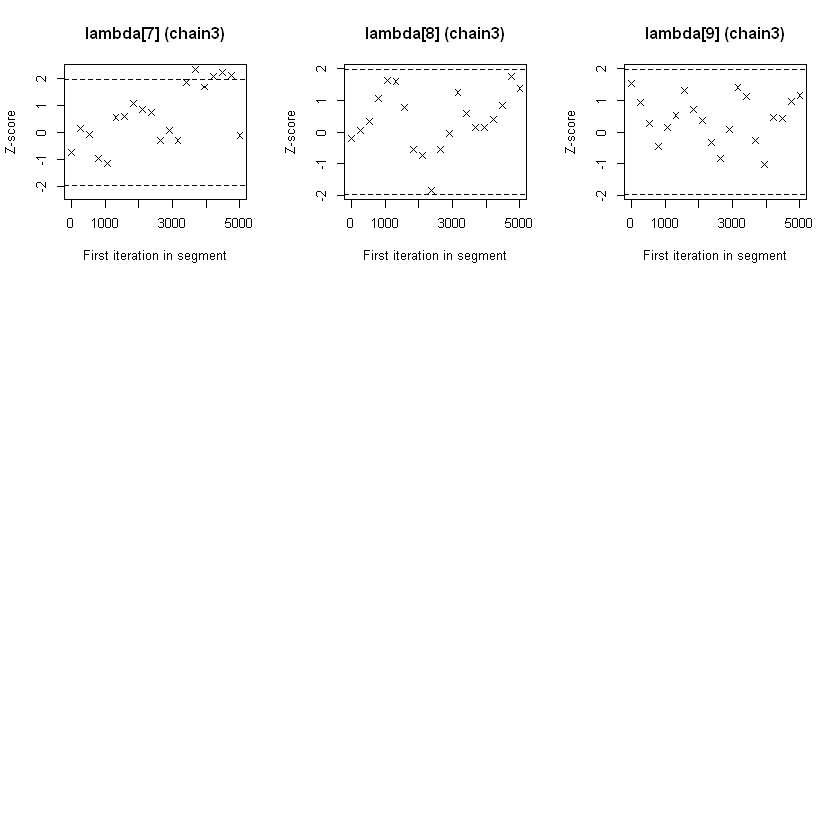

In [28]:
geweke.plot(pumps.m2.mcmc)

### Heidelberger and Welch's convergence diagnostic

In [29]:
heidel.diag(pumps.m2.mcmc)

[[1]]
                                         
           Stationarity start     p-value
           test         iteration        
alpha      passed          1      0.558  
beta       passed          1      0.362  
deviance   passed          1      0.268  
lambda[1]  passed          1      0.945  
lambda[10] passed          1      0.321  
lambda[2]  passed          1      0.445  
lambda[3]  passed          1      0.240  
lambda[4]  passed          1      0.740  
lambda[5]  passed          1      0.848  
lambda[6]  passed          1      0.578  
lambda[7]  passed       1001      0.177  
lambda[8]  passed       2001      0.101  
lambda[9]  passed          1      0.901  
                                      
           Halfwidth Mean    Halfwidth
           test                       
alpha      passed     0.6954 0.012361 
beta       passed     0.9278 0.023369 
deviance   passed    42.7798 0.082286 
lambda[1]  passed     0.0599 0.000496 
lambda[10] passed     1.9910 0.008603 
lambda[2] 

### Raftery and Lewis's diagnostic

In [30]:
raftery.diag(pumps.m2.mcmc)

[[1]]

Quantile (q) = 0.025
Accuracy (r) = +/- 0.005
Probability (s) = 0.95 
                                                  
            Burn-in  Total Lower bound  Dependence
            (M)      (N)   (Nmin)       factor (I)
 alpha      6        6636  3746         1.770     
 beta       6        8126  3746         2.170     
 deviance   2        3680  3746         0.982     
 lambda[1]  2        3741  3746         0.999     
 lambda[10] 2        3897  3746         1.040     
 lambda[2]  2        3835  3746         1.020     
 lambda[3]  2        3771  3746         1.010     
 lambda[4]  2        3899  3746         1.040     
 lambda[5]  2        3771  3746         1.010     
 lambda[6]  2        3771  3746         1.010     
 lambda[7]  2        3929  3746         1.050     
 lambda[8]  2        3771  3746         1.010     
 lambda[9]  2        3834  3746         1.020     


[[2]]

Quantile (q) = 0.025
Accuracy (r) = +/- 0.005
Probability (s) = 0.95 
                            